In [2]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [3]:
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
os.chdir("Q:\\F_Train")

In [16]:
X = []
Y = []
for dirc in tqdm(os.listdir(),desc="Loading..."):
    path = "Q:\\F_Train\\{}".format(dirc)
    list = []
    for f in os.listdir(path):
        path = "Q:\\F_Train\\{}\\{}".format(dirc,f)
        img = cv2.imread(path)
        X.append(img)
        Y.append(int(dirc))

Loading...: 100%|███████████████████████████████████████████████████████████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]


In [68]:
Y = np.array(Y)
X = np.array(X)
class_names = [np.arange(1,33)]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [47]:
(len(X_train),len(y_train)),(len(X_test),len(y_test))

(31360, 31360)

In [90]:
X_train[0].shape

(85, 85, 3)

In [92]:
# Building our cnn model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='ReLU',input_shape=(85,85,3)),
    tf.keras.layers.Conv2D(10,3,activation='ReLU'),

    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),

    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='ReLU',input_shape=(85,85,3)),
    tf.keras.layers.Conv2D(10,3,activation='ReLU'),
    
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='ReLU',input_shape=(85,85,3)),
    tf.keras.layers.Conv2D(10,3,activation='ReLU'),
    
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(33,activation='softmax')

])

# Compile our model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(2e-4),metrics=['accuracy'])

# Fit the model
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
980/980 [==============================] - 80s 80ms/step - loss: 2.8318 - accuracy: 0.2436
Epoch 2/5
980/980 [==============================] - 78s 80ms/step - loss: 1.4544 - accuracy: 0.5848
Epoch 3/5
980/980 [==============================] - 83s 85ms/step - loss: 1.1041 - accuracy: 0.6788
Epoch 4/5
980/980 [==============================] - 78s 80ms/step - loss: 0.9270 - accuracy: 0.7257
Epoch 5/5
980/980 [==============================] - 78s 80ms/step - loss: 0.8037 - accuracy: 0.7579


In [109]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
980/980 [==============================] - 71s 72ms/step - loss: 0.1564 - accuracy: 0.9478
Epoch 2/5
980/980 [==============================] - 74s 75ms/step - loss: 0.1487 - accuracy: 0.9507
Epoch 3/5
980/980 [==============================] - 80s 82ms/step - loss: 0.1445 - accuracy: 0.9523
Epoch 4/5
980/980 [==============================] - 82s 83ms/step - loss: 0.1416 - accuracy: 0.9515
Epoch 5/5
980/980 [==============================] - 81s 83ms/step - loss: 0.1352 - accuracy: 0.9551


In [94]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [110]:
probs = model.predict(X_test)
preds = probs.argmax(axis=1)

420/420 [==============================] - 9s 21ms/step


ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (1).

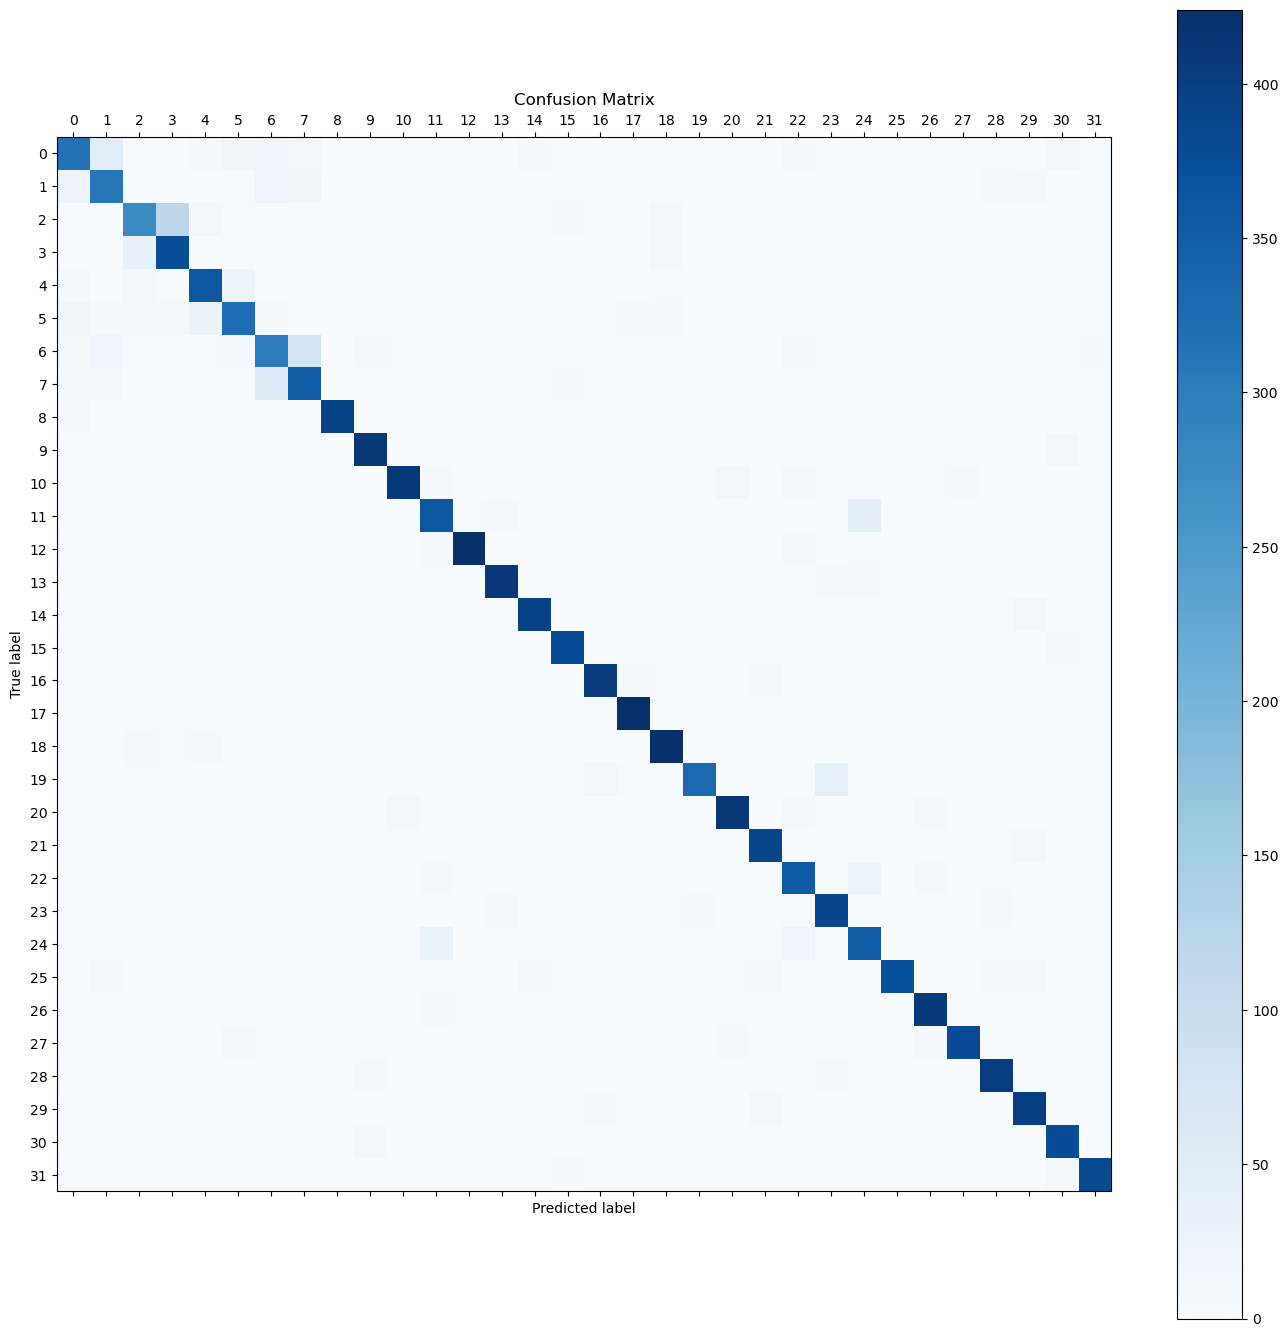

In [111]:
make_confusion_matrix(y_test,preds,classes=class_names,figsize=(17,17),text_size=15)

In [112]:
model.evaluate(X_test,y_test)

420/420 [==============================] - 9s 22ms/step - loss: 0.4280 - accuracy: 0.8895


[0.42804983258247375, 0.8895089030265808]

(<matplotlib.image.AxesImage at 0x1a9971338e0>, 2, 2)

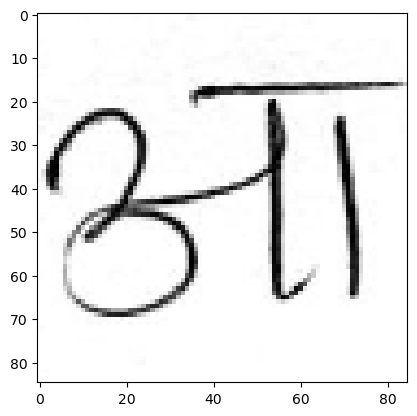

In [188]:
ind = random.randint(1,13440)
plt.imshow(X_test[ind]),y_test[ind],preds[ind]

In [187]:
len(X_test)

13440